<a href="https://colab.research.google.com/github/pshivani234/AIML-IIITH/blob/main/AIML_III_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk # natural language toolkit
from nltk.util import ngrams # N-grams are continuous sequences of words or symbols, or tokens in a document
from collections import Counter
# The collection Module in Python provides different types of containers.
# A Container is an object that is used to store different objects and provide a way to access the contained objects and iterate over them.
import matplotlib.pyplot as plt
import numpy as np
import re # regular expression support
import unicodedata # provides access to unicode character database Eg:ASCII
import plotly.express as px # used to create interactive graphs
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=2fb5ad52c464e53272e05b3b6b82bbfffdf2c5126ceacfe1f59113affe7e2f85
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [ ]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [ ]:
eng1


'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into up to eight extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species of Giraffa are known from the fossil record.\nThe giraffe\'s chief distinguishing characteristics are its extremely long neck and legs, its horn-like ossicones, and its spotted coat patterns. It is classified under the family Giraffidae, along with its closest extant relative, the okapi. Its scattered range extends from Chad in the north to South Africa in the south, and from Niger in the west to Somalia in the east. Giraffes usually inhabit savannahs and woodlands. Their food source is 

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [ ]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # ONLY keep characters
  # ^ - negation, [a-z] - in the range a to z, + - one or more charater match
  # re.sub(pattern, replace with, string) - substitute pattern with replace
  return text

In [ ]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraff

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [ ]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  print(ngram.keys())
  print(ngram.values())
  keys = key2string(ngram.keys()) # eg: keys=['cd', 'ab', 'ef']
  values = list(ngram.values()) # eg: values=[3, 2, 1]

  # sort the keys in alphabetic order
  combined = zip(keys, values) # combined = [('cd', 3), ('ab', 2), ('ef', 1)]
  zipped_sorted = sorted(combined, key=lambda x: x[0]) # sorting based on first element
  keys, values = map(list, zip(*zipped_sorted)) # unzipping
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

dict_keys([('t',), ('h',), ('e',), ('g',), ('i',), ('r',), ('a',), ('f',), ('s',), ('l',), ('c',), ('n',), ('o',), ('d',), ('m',), ('b',), ('u',), ('v',), ('y',), ('p',), ('w',), ('x',), ('k',), ('z',), ('j',), ('q',)])
dict_values([2539, 1447, 3953, 956, 2445, 2089, 2951, 1083, 2255, 1393, 1010, 2145, 2099, 1154, 818, 451, 806, 377, 425, 673, 385, 81, 231, 32, 22, 14])


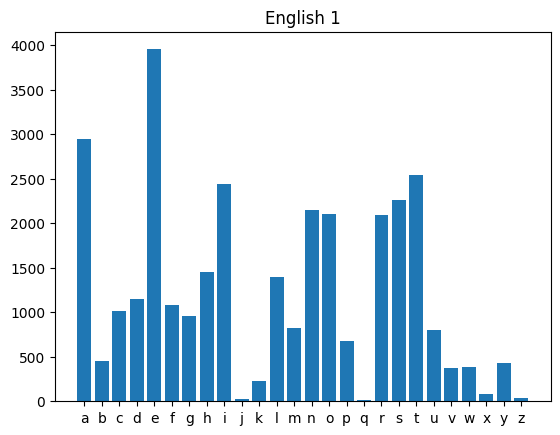

dict_keys([('e',), ('l',), ('p',), ('h',), ('a',), ('n',), ('t',), ('s',), ('r',), ('g',), ('i',), ('v',), ('d',), ('m',), ('c',), ('u',), ('y',), ('o',), ('f',), ('b',), ('x',), ('k',), ('w',), ('j',), ('z',), ('q',)])
dict_values([5459, 2212, 1112, 2296, 4139, 3388, 3827, 3117, 2651, 851, 3140, 498, 1572, 1145, 1304, 1231, 651, 2855, 877, 672, 91, 333, 609, 45, 43, 23])


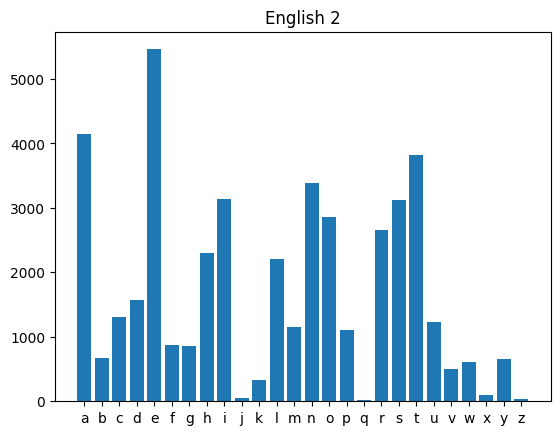

In [ ]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

dict_keys([('l',), ('a',), ('g',), ('i',), ('r',), ('f',), ('e',), ('c',), ('m',), ('o',), ('p',), ('d',), ('s',), ('t',), ('u',), ('n',), ('y',), ('v',), ('h',), ('j',), ('q',), ('b',), ('z',), ('x',), ('k',), ('w',)])
dict_values([1206, 1613, 364, 1338, 1316, 365, 3070, 692, 556, 1088, 593, 771, 1682, 1307, 1186, 1456, 60, 209, 162, 42, 187, 176, 35, 98, 38, 16])


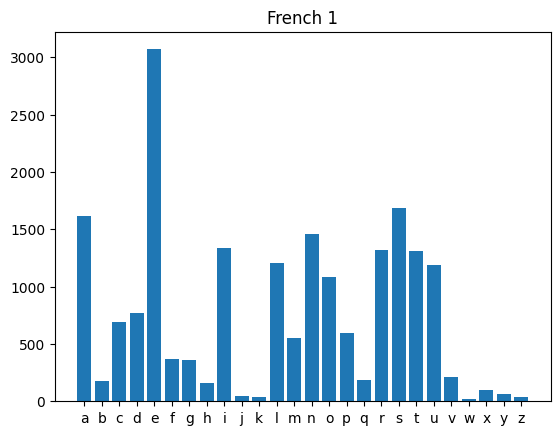

dict_keys([('l',), ('e',), ('s',), ('p',), ('h',), ('a',), ('n',), ('t',), ('o',), ('d',), ('m',), ('i',), ('f',), ('r',), ('b',), ('c',), ('u',), ('j',), ('x',), ('g',), ('v',), ('q',), ('y',), ('k',), ('z',), ('w',)])
dict_values([1953, 4575, 2706, 1061, 445, 2259, 2368, 2214, 1566, 1294, 916, 1972, 343, 1998, 272, 920, 1668, 66, 140, 336, 315, 295, 73, 39, 24, 10])


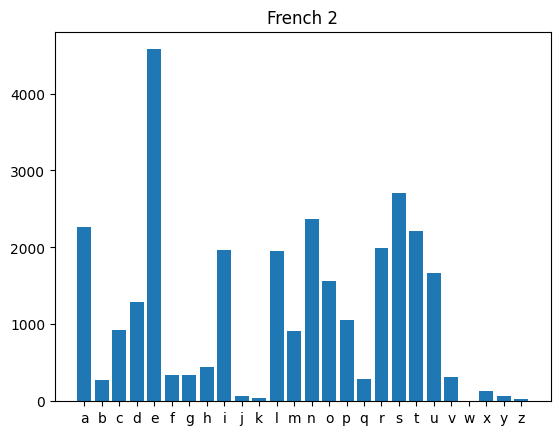

In [ ]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_fr1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

dict_keys([('t', 'h'), ('h', 'e'), ('e', 'g'), ('g', 'i'), ('i', 'r'), ('r', 'a'), ('a', 'f'), ('f', 'f'), ('f', 'e'), ('e', 'i'), ('i', 's'), ('s', 'a'), ('a', 'l'), ('l', 'a'), ('a', 'r'), ('r', 'g'), ('g', 'e'), ('e', 'a'), ('f', 'r'), ('r', 'i'), ('i', 'c'), ('c', 'a'), ('a', 'n'), ('n', 'h'), ('h', 'o'), ('o', 'o'), ('o', 'f'), ('e', 'd'), ('d', 'm'), ('m', 'a'), ('a', 'm'), ('m', 'm'), ('l', 'b'), ('b', 'e'), ('e', 'l'), ('l', 'o'), ('o', 'n'), ('n', 'g'), ('i', 'n'), ('g', 't'), ('t', 'o'), ('o', 't'), ('e', 'n'), ('n', 'u'), ('u', 's'), ('s', 'g'), ('f', 'a'), ('a', 'i'), ('i', 't'), ('t', 'i'), ('s', 't'), ('e', 't'), ('t', 'a'), ('l', 'l'), ('l', 'e'), ('e', 's'), ('t', 'l'), ('l', 'i'), ('i', 'v'), ('v', 'i'), ('t', 'e'), ('e', 'r'), ('r', 'r'), ('r', 'e'), ('t', 'r'), ('i', 'a'), ('n', 'i'), ('i', 'm'), ('n', 'd'), ('d', 't'), ('r', 'u'), ('u', 'm'), ('m', 'i'), ('n', 'a'), ('n', 't'), ('n', 'e'), ('r', 't'), ('h', 't'), ('a', 'd'), ('d', 'i'), ('i', 'o'), ('l', 'y'), ('y',

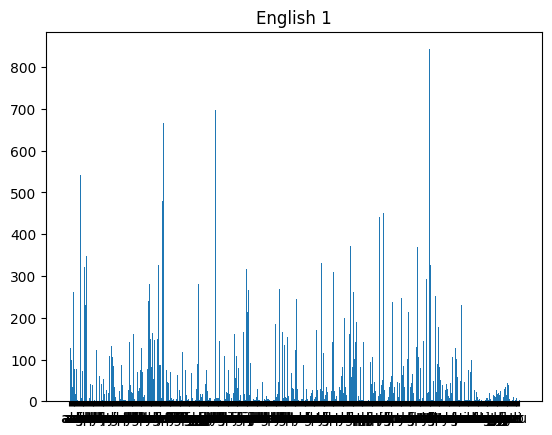

dict_keys([('e', 'l'), ('l', 'e'), ('e', 'p'), ('p', 'h'), ('h', 'a'), ('a', 'n'), ('n', 't'), ('t', 's'), ('s', 'a'), ('a', 'r'), ('r', 'e'), ('e', 't'), ('t', 'h'), ('h', 'e'), ('l', 'a'), ('r', 'g'), ('g', 'e'), ('e', 's'), ('s', 't'), ('t', 'l'), ('l', 'i'), ('i', 'v'), ('v', 'i'), ('i', 'n'), ('n', 'g'), ('g', 'l'), ('n', 'd'), ('d', 'a'), ('n', 'i'), ('i', 'm'), ('m', 'a'), ('a', 'l'), ('l', 's'), ('h', 'r'), ('e', 'e'), ('g', 's'), ('s', 'p'), ('p', 'e'), ('e', 'c'), ('c', 'i'), ('i', 'e'), ('c', 'u'), ('u', 'r'), ('r', 'r'), ('e', 'n'), ('l', 'y'), ('y', 'r'), ('c', 'o'), ('o', 'g'), ('g', 'n'), ('i', 's'), ('s', 'e'), ('e', 'd'), ('d', 't'), ('e', 'a'), ('a', 'f'), ('f', 'r'), ('r', 'i'), ('i', 'c'), ('c', 'a'), ('n', 'b'), ('b', 'u'), ('u', 's'), ('s', 'h'), ('l', 'o'), ('o', 'x'), ('x', 'o'), ('o', 'd'), ('d', 'o'), ('o', 'n'), ('t', 'a'), ('a', 'a'), ('n', 'a'), ('a', 't'), ('n', 'f'), ('f', 'o'), ('o', 'r'), ('t', 'e'), ('l', 'c'), ('c', 'y'), ('y', 'c'), ('c', 'l'), ('o',

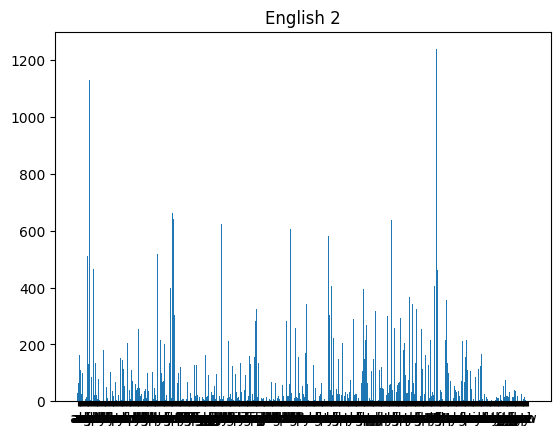

dict_keys([('t', 'h'), ('h', 'e'), ('e', 'g'), ('g', 'i'), ('i', 'r'), ('r', 'a'), ('a', 'f'), ('f', 'f'), ('f', 'e'), ('e', 'i'), ('i', 's'), ('s', 'a'), ('a', 'l'), ('l', 'a'), ('a', 'r'), ('r', 'g'), ('g', 'e'), ('e', 'a'), ('f', 'r'), ('r', 'i'), ('i', 'c'), ('c', 'a'), ('a', 'n'), ('n', 'h'), ('h', 'o'), ('o', 'o'), ('o', 'f'), ('e', 'd'), ('d', 'm'), ('m', 'a'), ('a', 'm'), ('m', 'm'), ('l', 'b'), ('b', 'e'), ('e', 'l'), ('l', 'o'), ('o', 'n'), ('n', 'g'), ('i', 'n'), ('g', 't'), ('t', 'o'), ('o', 't'), ('e', 'n'), ('n', 'u'), ('u', 's'), ('s', 'g'), ('f', 'a'), ('a', 'i'), ('i', 't'), ('t', 'i'), ('s', 't'), ('e', 't'), ('t', 'a'), ('l', 'l'), ('l', 'e'), ('e', 's'), ('t', 'l'), ('l', 'i'), ('i', 'v'), ('v', 'i'), ('t', 'e'), ('e', 'r'), ('r', 'r'), ('r', 'e'), ('t', 'r'), ('i', 'a'), ('n', 'i'), ('i', 'm'), ('n', 'd'), ('d', 't'), ('r', 'u'), ('u', 'm'), ('m', 'i'), ('n', 'a'), ('n', 't'), ('n', 'e'), ('r', 't'), ('h', 't'), ('a', 'd'), ('d', 'i'), ('i', 'o'), ('l', 'y'), ('y',

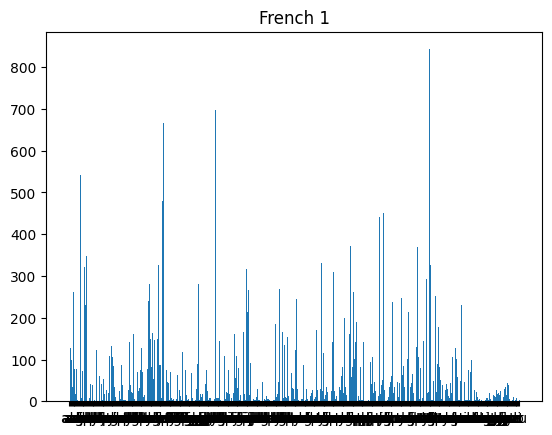

dict_keys([('l', 'e'), ('e', 's'), ('s', 'l'), ('l', 'p'), ('p', 'h'), ('h', 'a'), ('a', 'n'), ('n', 't'), ('t', 's'), ('s', 's'), ('s', 'o'), ('o', 'n'), ('t', 'd'), ('d', 'e'), ('s', 'm'), ('m', 'a'), ('a', 'm'), ('m', 'm'), ('m', 'i'), ('i', 'f'), ('f', 'r'), ('r', 'e'), ('s', 'p'), ('p', 'r'), ('r', 'o'), ('o', 'b'), ('b', 'o'), ('o', 's'), ('s', 'c'), ('c', 'i'), ('i', 'd'), ('d', 'i'), ('i', 'e'), ('e', 'n'), ('n', 's'), ('s', 'd'), ('e', 'l'), ('l', 'a'), ('a', 'f'), ('f', 'a'), ('i', 'l'), ('l', 'l'), ('e', 'd'), ('t', 'i'), ('d', 's'), ('s', 'i'), ('l', 's'), ('c', 'o'), ('o', 'r'), ('r', 'r'), ('p', 'o'), ('n', 'd'), ('t', 'a'), ('a', 'u'), ('u', 'j'), ('j', 'o'), ('o', 'u'), ('u', 'r'), ('r', 'd'), ('d', 'h'), ('h', 'u'), ('u', 'i'), ('i', 't'), ('t', 'r'), ('o', 'i'), ('i', 's'), ('s', 'e'), ('p', 'c'), ('c', 'e'), ('s', 'r'), ('r', 'p'), ('p', 'a'), ('a', 'r'), ('r', 't'), ('e', 'u'), ('u', 'x'), ('x', 'g'), ('g', 'e'), ('n', 'r'), ('s', 't'), ('i', 'n'), ('n', 'c'), ('c',

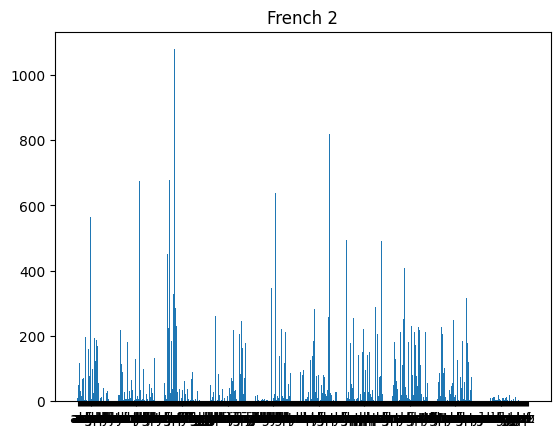

In [ ]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [ ]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))] # ord()- converts into ascii val, chr()- converts to character from ascii
  plt.imshow(freq, cmap = 'jet') # cmap='jet' - specifies the color map from blue to red increase in freq
  return freq

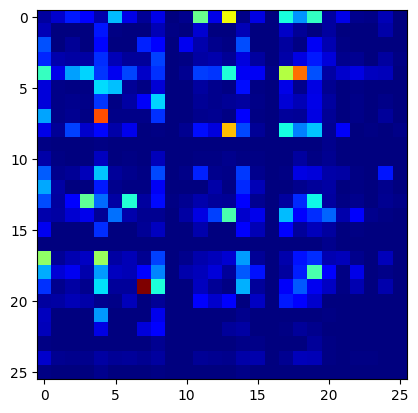

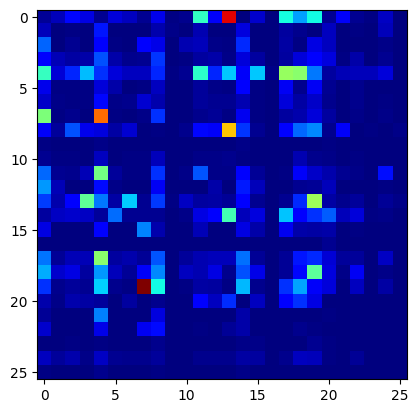

In [ ]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

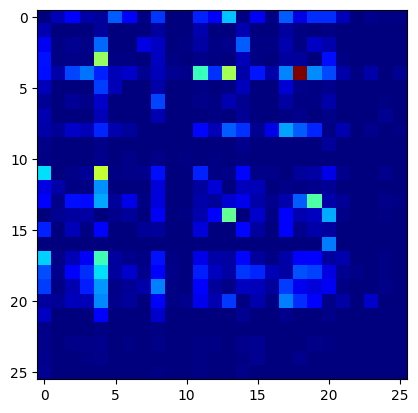

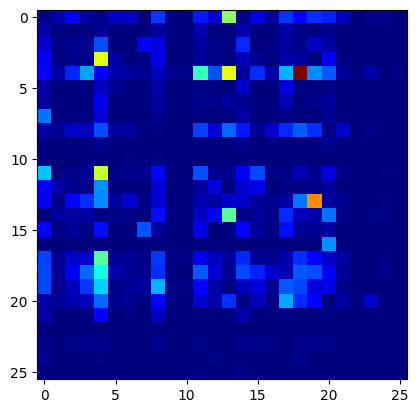

In [ ]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [ ]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]} {arg[ii]}')

In [ ]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 843.0 501
('h', 'e') : 697.0 186
('e', 's') : 667.0 122
('i', 'n') : 597.0 221
('a', 'n') : 543.0 13
('e', 'r') : 480.0 121
('r', 'e') : 452.0 446
('r', 'a') : 442.0 442
('a', 'l') : 402.0 11
('n', 'd') : 395.0 341

English 2:
('t', 'h') : 1238.0 501
('a', 'n') : 1130.0 13
('h', 'e') : 985.0 186
('i', 'n') : 867.0 221
('n', 't') : 669.0 357
('e', 'r') : 661.0 121
('e', 's') : 641.0 122
('r', 'e') : 639.0 446
('h', 'a') : 622.0 182
('l', 'e') : 607.0 290

French 1:
('e', 's') : 738.0 122
('l', 'e') : 435.0 290
('e', 'n') : 406.0 117
('d', 'e') : 394.0 82
('o', 'n') : 347.0 377
('n', 't') : 329.0 357
('r', 'e') : 315.0 446
('e', 'l') : 309.0 115
('l', 'a') : 254.0 286
('s', 'e') : 254.0 472

French 2:
('e', 's') : 1078.0 122
('n', 't') : 819.0 357
('e', 'n') : 679.0 117
('d', 'e') : 675.0 82
('l', 'e') : 638.0 290
('a', 'n') : 564.0 13
('o', 'n') : 494.0 377
('r', 'e') : 490.0 446
('e', 'l') : 452.0 115
('s', 'e') : 408.0 472


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [ ]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [ ]:
no1 = train_X[train_y==1,:,:] # 1- condition, 2- slicing along axis(in this case the index of img), 3- rows of img
no0 = train_X[train_y==0,:,:]
no2 = train_X[train_y==2,:,:]

Let us visualize a few images here:

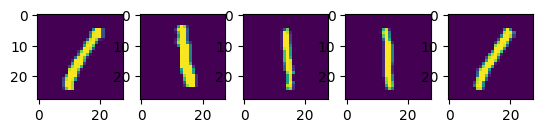

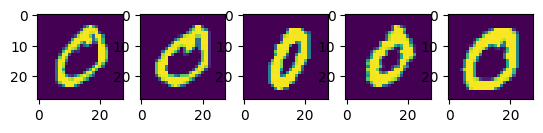

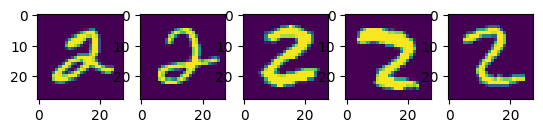

In [ ]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [ ]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2)) # (1,2) is the axis along which sum is calculated
sum2 = np.sum(no2>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

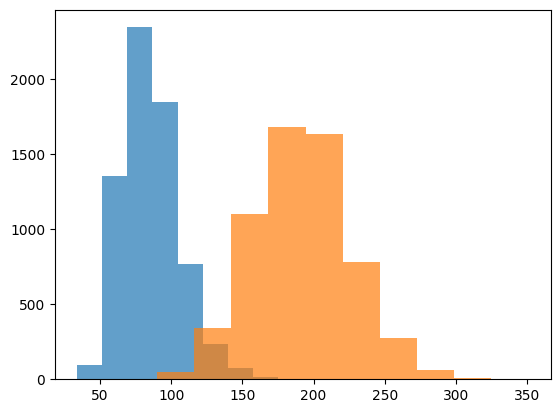

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

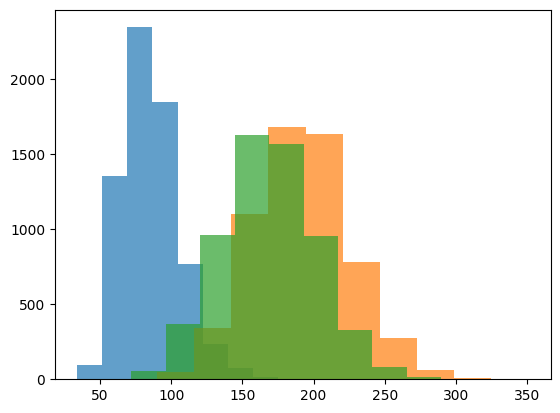

In [ ]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);
plt.hist(sum2, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [ ]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

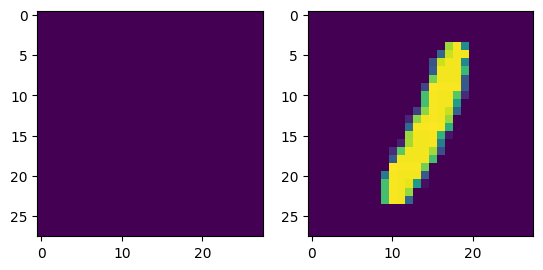

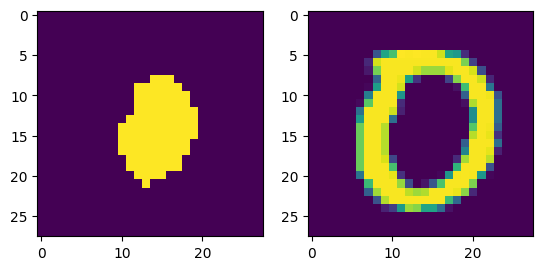

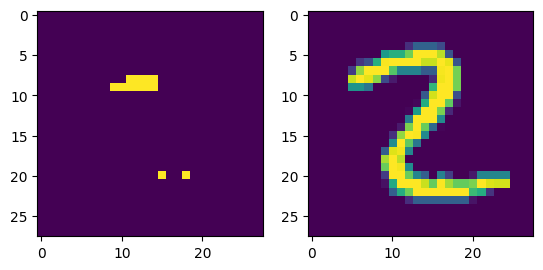

In [ ]:
imgs = [no1[45,:,:],  no0[45,:,:], no2[4,:,:]] # 1st argument is the img number
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

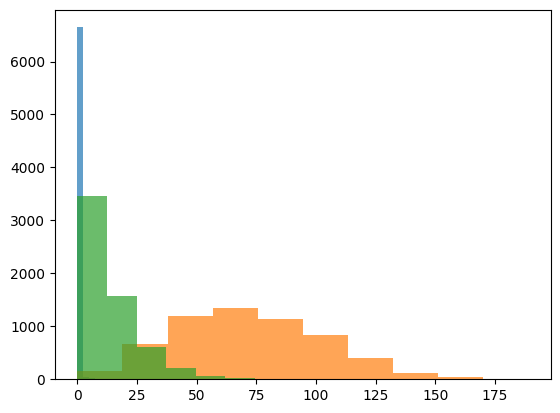

In [ ]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])
hole2 = np.array([getHolePixels(i).sum() for i in no2])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);
plt.hist(hole2, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [ ]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull # this doesn't remove the img

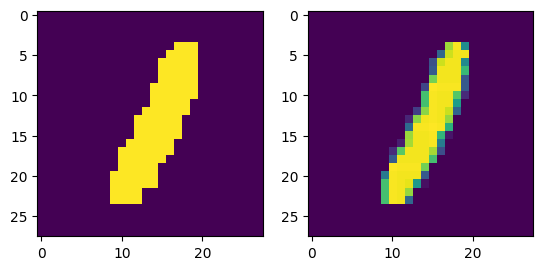

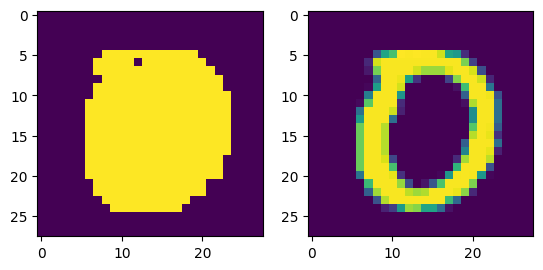

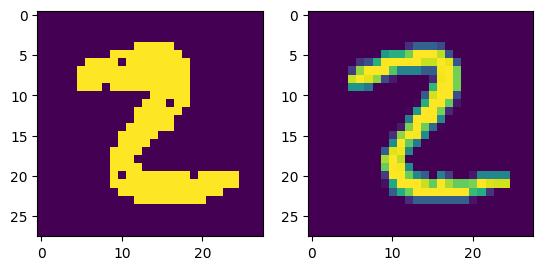

In [ ]:
imgs = [no1[45,:,:],  no0[45,:,:], no2[4,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

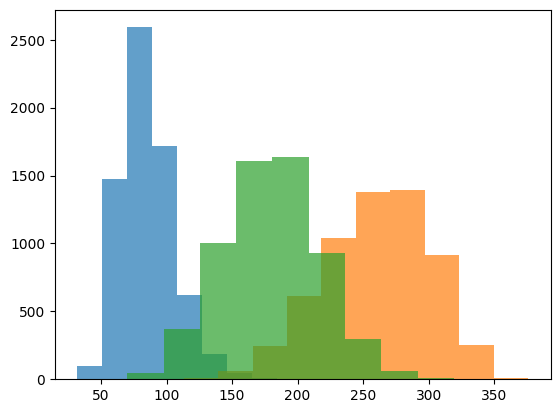

In [ ]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])
hull2 = np.array([getHullPixels(i).sum() for i in no2])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);
plt.hist(hull2, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [ ]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

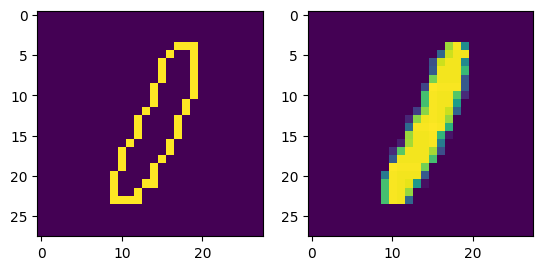

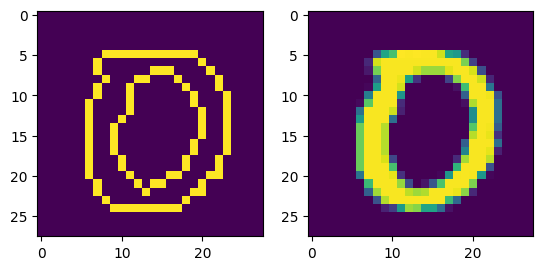

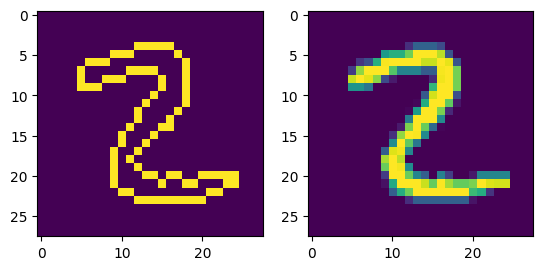

In [ ]:
imgs = [no1[45,:,:],  no0[45,:,:], no2[4,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

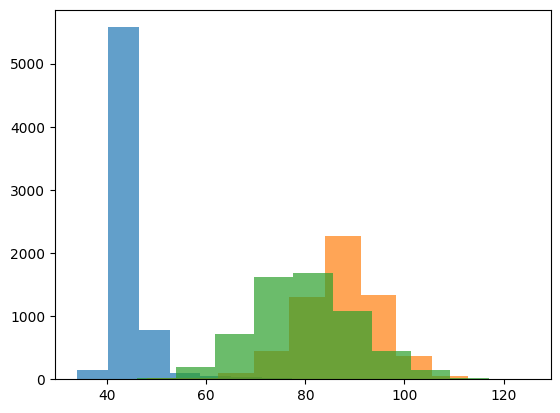

In [ ]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])
bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);
plt.hist(bound2, alpha=0.7);

What will happen if we plot two features together?

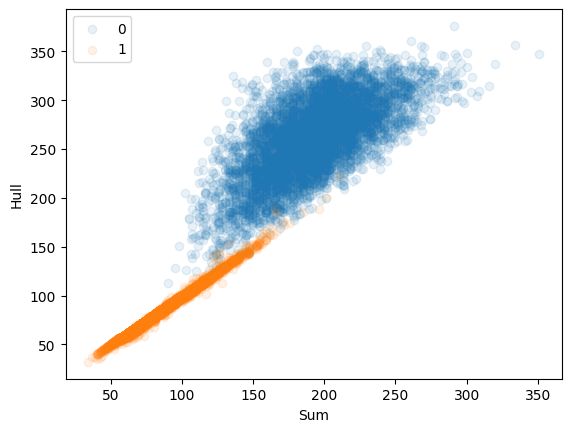

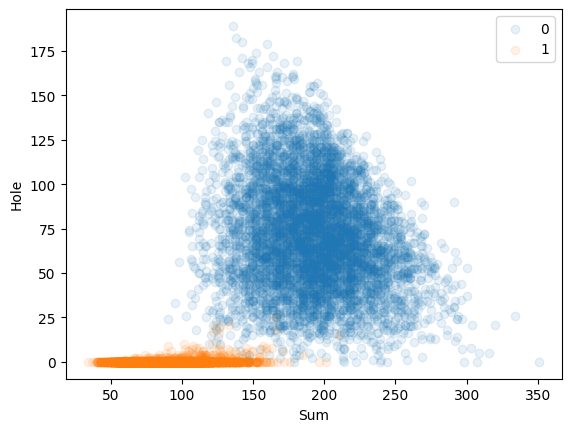

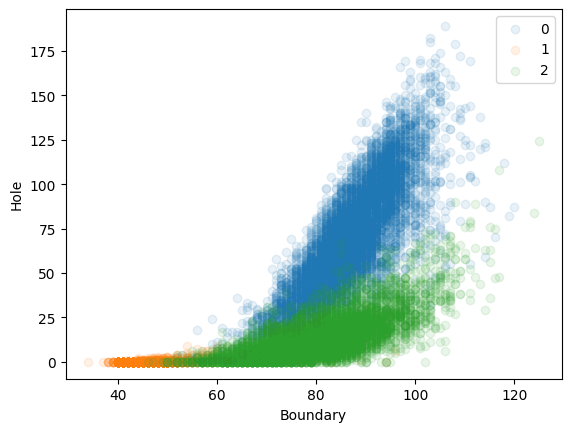

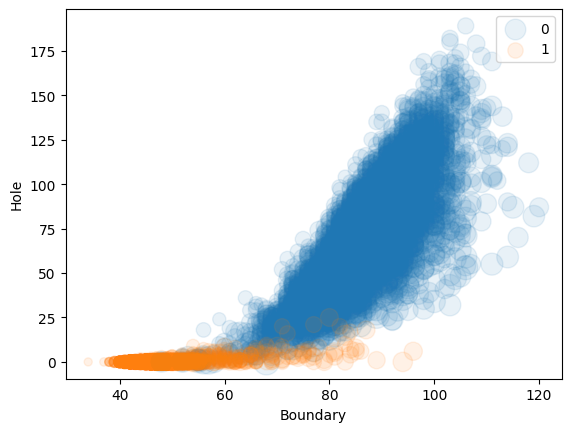

In [ ]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.scatter(bound2, hole2, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1','2'])
plt.show()

# Hole and boundary and sum
plt.scatter(bound0, hole0, sum0, alpha=0.1)
plt.scatter(bound1, hole1, sum1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
# plt.zlabel('Sum') there is no attribute zlabel as it is 2D
# but there seems to be a difference if 3rd is added i.e, the size of point is big
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 2']*len(sum2)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole2)), np.concatenate((sum1,sum2)),
                           np.concatenate((bound1,bound2)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

In [ ]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole1, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?